# Interim Operational Capability 1

## Set up.

### Import packages.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))

In [2]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [3]:
designs = ty.Designs("data")

In [4]:
investments = ty.Investments("data")

### Compile the production and metric functions for each technology in the dataset.

In [5]:
designs.compile()

## Examine the input data.

### The `functions` table specifies where the Python code for each technology resides.

In [6]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
PV Generic,numpy,pv_residential_generic,capital_cost,fixed_cost,production,metrics,generic residential PV


### The `indices` table defines the subscripts for variables.

In [7]:
designs.indices.drop("Offset", axis = 1)

Description Notes
Technology Type    Index                                      
PV Generic Capital BoS                 balance of system      
                   Inverter             system inverters      
                   Module                  system module      
           Fixed   System                   whole system      
           Input   Strategic         strategic materials      
           Metric  Capital                  capital cost      
                   Efficiency          module efficiency      
                   GHG              greenouse gas offset      
                   Hazardous    hazardous waste produced      
                   LCOE         levelized cost of energy      
                   Lifetime              module lifetime      
                   Strategic        strategic metal used      
                   Yield                  specific yield      
           Output  Electricity     electricity generated      
                   GHG             greenhouse gas offset      
                   Hazardous    hazardous waste produced

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [8]:
designs.designs.xs("Reference", level = "Scenario", drop_level = False)

Value            Units  \
Technology Scenario  Variable          Index                                
PV Generic Reference Input             Strategic       0         g/system   
                     Input efficiency  Strategic       1            %/100   
                     Input price       Stategic        0              $/g   
                     Lifetime          BoS             1  system-lifetime   
                                       Inverter        1  system-lifetime   
                                       Module          1  system-lifetime   
                     Output efficiency Electricity     1            %/100   
                                       GHG             1            %/100   
                                       Hazardous       1            %/100   
                     Output price      Electricity     0            $/kWh   
                                       GHG             0          $/gCO2e   
                                       Hazardous       0              $/g   
                     Scale             NaN             1    system/system   

                                                                                              Notes  
Technology Scenario  Variable          Index                                                         
PV Generic Reference Input             Strategic                                    zero by default  
                     Input efficiency  Strategic                                         no scaling  
                     Input price       Stategic                                     zero by default  
                     Lifetime          BoS                                per-lifetime computations  
                                       Inverter                           per-lifetime computations  
                                       Module                             per-lifetime computations  
                     Output efficiency Electricity  see parameter table for individual efficiencies  
                                       GHG          see parameter table for individual efficiencies  
                                       Hazardous    see parameter table for individual efficiencies  
                     Output price      Electricity                   not tracking electricity price  
                                       GHG                             not tracking hazardous waste  
                                       Hazardous                       not tracking hazardous waste  
                     Scale             NaN                                               no scaling

### The `parameters` table contains additional techno-economic parameters for each technology.

In [9]:
designs.parameters.drop("Offset", axis = 1).xs("Reference", level = "Scenario", drop_level = False)

Value      Units  \
Technology Scenario  Parameter                                              
PV Generic Reference Benchmark LCOC                    2.51977      $/Wdc   
                     Benchmark LCOE                   0.086773      $/kWh   
                     Customer Acquisition                 2000   $/system   
                     Direct Labor                         2000   $/system   
                     Discount Rate                        0.07     1/year   
                     Greenhouse Gas Offset        0.4490564e-3  gCO2e/kWh   
                     Hardware Capital                       80      $/m^2   
                     Hazardous Waste Content              1830      g/m^2   
                     Insolation                           1000      W/m^2   
                     Installer Overhead & Profit          0.35          1   
                     Inverter Capital                      0.3        $/W   
                     Inverter Efficiency                   0.9      %/100   
                     Inverter Lifetime                      16         yr   
                     Inverter Replacement                  0.5      %/100   
                     Location Capacity Factor              0.2      %/100   
                     Module Aperture                       0.9      %/100   
                     Module Capital                        110      $/m^2   
                     Module Degradation                 0.0075       1/yr   
                     Module Efficiency                   0.208      %/100   
                     Module Lifetime                        25         yr   
                     Module O&M Fixed                       20    $/kW/yr   
                     Module Soiling Loss                  0.05      %/100   
                     Permitting                            600   $/system   
                     System Size                            36        m^2   

                                                 Notes  
Technology Scenario  Parameter                          
PV Generic Reference Benchmark LCOC                     
                     Benchmark LCOE                     
                     Customer Acquisition          BCA  
                     Direct Labor                  BLR  
                     Discount Rate                  DR  
                     Greenhouse Gas Offset              
                     Hardware Capital              BCC  
                     Hazardous Waste Content            
                     Insolation                    INS  
                     Installer Overhead & Profit   BOH  
                     Inverter Capital              ICC  
                     Inverter Efficiency           IEF  
                     Inverter Lifetime             ILT  
                     Inverter Replacement          IRC  
                     Location Capacity Factor      MCF  
                     Module Aperture               MAP  
                     Module Capital                MCC  
                     Module Degradation            MDR  
                     Module Efficiency             MEF  
                     Module Lifetime               MLT  
                     Module O&M Fixed              MOM  
                     Module Soiling Loss           MSL  
                     Permitting                    BPR  
                     System Size                   SSZ

### The `results` table specifies the units of measure for results of computations.

In [10]:
designs.results

Units Notes
Technology Variable Index                           
PV Generic Cost     Cost              $/system      
           Metric   Capital             Δ$/Wdc      
                    Efficiency           %/100      
                    GHG          ΔgCO2e/system      
                    Hazardous            g/kWh      
                    LCOE                Δ$/kWh      
                    Lifetime                yr      
                    Strategic            g/kWh      
                    Yield                hr/yr      
           Output   Electricity     kWh/system      
                    GHG          ΔgCO2e/system      
                    Hazardous         g/system

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [11]:
investments.tranches

Amount Notes
Category          Tranche             Scenario                            
CIGS              CIGS 0              CIGS 0                     0.0      
                  CIGS 1              CIGS 1               1500000.0      
                  CIGS 2              CIGS 2               3000000.0      
CdTe              CdTe 0              CdTe 0                     0.0      
                  CdTe 1              CdTe 1               3000000.0      
                  CdTe 2              CdTe 2               6000000.0      
GaAs              GaAs 0              GaAs 0                     0.0      
                  GaAs 1              GaAs 1               5000000.0      
                  GaAs 2              GaAs 2               7500000.0      
InGaP             InGaP 0             InGaP 0                    0.0      
                  InGaP 1             InGaP 1              3500000.0      
                  InGaP 2             InGaP 2              9500000.0      
Perovskite        Perovskite 0        Perovskite 0               0.0      
                  Perovskite 1        Perovskite 1         7500000.0      
                  Perovskite 2        Perovskite 2         9500000.0      
Polysilicon       Polysilicon 0       Polysilicon 0              0.0      
                  Polysilicon 1       Polysilicon 1        2500000.0      
                  Polysilicon 2       Polysilicon 2        4500000.0      
Power Electronics Power Electronics 0 Polysilicon 0              0.0      
                  Power Electronics 1 Power Electronics 1  1000000.0      
                  Power Electronics 2 Power Electronics 2  5000000.0      
Soft Costs        Soft Costs 0        Polysilicon 0              0.0      
                  Soft Costs 1        Soft Costs 1         1000000.0      
                  Soft Costs 2        Soft Costs 2         5000000.0

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [12]:
investments.investments

Notes
Investment   Category          Tranche                  
High R&D     CIGS              CIGS 2                   
             CdTe              CdTe 2                   
             GaAs              GaAs 2                   
             InGaP             InGaP 2                  
             Perovskite        Perovskite 2             
             Polysilicon       Polysilicon 2            
             Power Electronics Power Electronics 2      
             Soft Costs        Soft Costs 2             
Moderate R&D CIGS              CIGS 1                   
             CdTe              CdTe 1                   
             GaAs              GaAs 1                   
             InGaP             InGaP 1                  
             Perovskite        Perovskite 1             
             Polysilicon       Polysilicon 1            
             Power Electronics Power Electronics 1      
             Soft Costs        Soft Costs 1             
No R&D       CIGS              CIGS 0                   
             CdTe              CdTe 0                   
             GaAs              GaAs 0                   
             InGaP             InGaP 0                  
             Perovskite        Perovskite 0             
             Polysilicon       Polysilicon 0            
             Power Electronics Power Electronics 0      
             Soft Costs        Soft Costs 0

## Evaluate the scenarios in the dataset.

In [13]:
scenario_results = designs.evaluate_scenarios(sample_count=500)

#### Format results as a pivot table.

In [14]:
scenario_results.xs(
    "PV Generic"
).groupby(
    ["Scenario", "Variable", "Index"]
).aggregate(
    np.mean
).xs(
    "Metric", level = 1
).pivot_table(
    index = "Scenario", columns = "Index"
)

Value                                 \
Index                     Capital Efficiency       GHG Hazardous   
Scenario                                                           
CIGS 0              -7.906337e-01   0.234451 -0.000449  0.055646   
CIGS 1              -2.116653e-01   0.264718 -0.000449  0.043985   
CIGS 2               1.214614e-01   0.275605 -0.000449  0.037783   
CdTe 0              -4.267734e-01   0.235262 -0.000449  0.053972   
CdTe 1              -1.059782e-01   0.254434 -0.000449  0.046002   
CdTe 2               2.436515e-01   0.284871 -0.000449  0.036950   
GaAs 0              -2.405653e-01   0.312541 -0.000449  0.075671   
GaAs 1              -1.933614e-02   0.312995 -0.000449  0.074337   
GaAs 2               4.614369e-01   0.344445 -0.000449  0.066199   
InGaP 0              3.862066e-01   0.403957 -0.000449  0.023513   
InGaP 1              7.409311e-01   0.410391 -0.000449  0.018421   
InGaP 2              9.529364e-01   0.397488 -0.000449  0.018081   
Perovskite 0        -1.129098e+00   0.181241 -0.000449  0.024887   
Perovskite 1        -3.794051e-01   0.225106 -0.000449  0.016900   
Perovskite 2         3.463575e-01   0.295037 -0.000449  0.008570   
Polysilicon 0        2.160681e-01   0.232855 -0.000449  0.247066   
Polysilicon 1        3.304653e-01   0.244328 -0.000449  0.205643   
Polysilicon 2        5.711203e-01   0.274477 -0.000449  0.149765   
Power Electronics 1  2.924906e-01   0.233081 -0.000449  0.235071   
Power Electronics 2  3.687766e-01   0.232817 -0.000449  0.227934   
Reference           -4.304827e-07   0.208000 -0.000449  0.275327   
Soft Costs 1         3.050965e-01   0.233291 -0.000449  0.246537   
Soft Costs 2         4.679263e-01   0.232831 -0.000449  0.247066   

                                                                     
Index                        LCOE   Lifetime Strategic        Yield  
Scenario                                                             
CIGS 0              -6.291729e-02  25.001219  0.013770   964.696395  
CIGS 1              -3.717712e-02  25.001233  0.011578   975.840216  
CIGS 2              -2.135567e-02  25.001230  0.010494   992.572173  
CdTe 0              -1.333759e-02  25.001249  0.031568  1278.375341  
CdTe 1              -5.894226e-04  25.001239  0.025703  1318.046932  
CdTe 2               1.188949e-02  25.001288  0.021673  1350.939329  
GaAs 0              -7.511181e-03  25.001270  0.007304  1278.378187  
GaAs 1              -3.221651e-04  25.001266  0.006218  1282.300008  
GaAs 2               1.511381e-02  25.001258  0.004897  1290.168512  
InGaP 0             -1.359010e-03  20.503161  0.003096  1310.521757  
InGaP 1              1.257216e-02  20.496003  0.002366  1323.817191  
InGaP 2              2.037577e-02  20.492675  0.002382  1323.840851  
Perovskite 0        -7.894423e-02  17.520167  0.007548  1335.701386  
Perovskite 1        -4.464760e-02  17.504919  0.005234  1359.083048  
Perovskite 2        -1.398294e-02  17.510660  0.003571  1359.005209  
Polysilicon 0        6.776000e-03  25.001270  0.000000  1278.378347  
Polysilicon 1        1.145231e-02  25.001239  0.000000  1297.047526  
Polysilicon 2        2.095292e-02  25.001264  0.000000  1338.012591  
Power Electronics 1  1.285827e-02  25.001248  0.000000  1342.288803  
Power Electronics 2  1.736538e-02  25.001201  0.000000  1385.431832  
Reference           -1.946058e-07  25.000000  0.000000  1278.202148  
Soft Costs 1         9.561357e-03  25.001237  0.000000  1278.377269  
Soft Costs 2         1.465605e-02  25.001257  0.000000  1278.377290

#### Print the units for the columns.

In [15]:
designs.results.loc["PV Generic", "Metric"].transpose()

Index,Capital,Efficiency,GHG,Hazardous,LCOE,Lifetime,Strategic,Yield
Units,Δ$/Wdc,%/100,ΔgCO2e/system,g/kWh,Δ$/kWh,yr,g/kWh,hr/yr
Notes,,,,,,,,


### Save results.

In [16]:
scenario_results.to_csv("output/example-scenario.csv")

### Plot the results.

/nix/store/2hqyq1p29z76wvh920r43a63sy9n1cag-python3-3.7.6-env/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


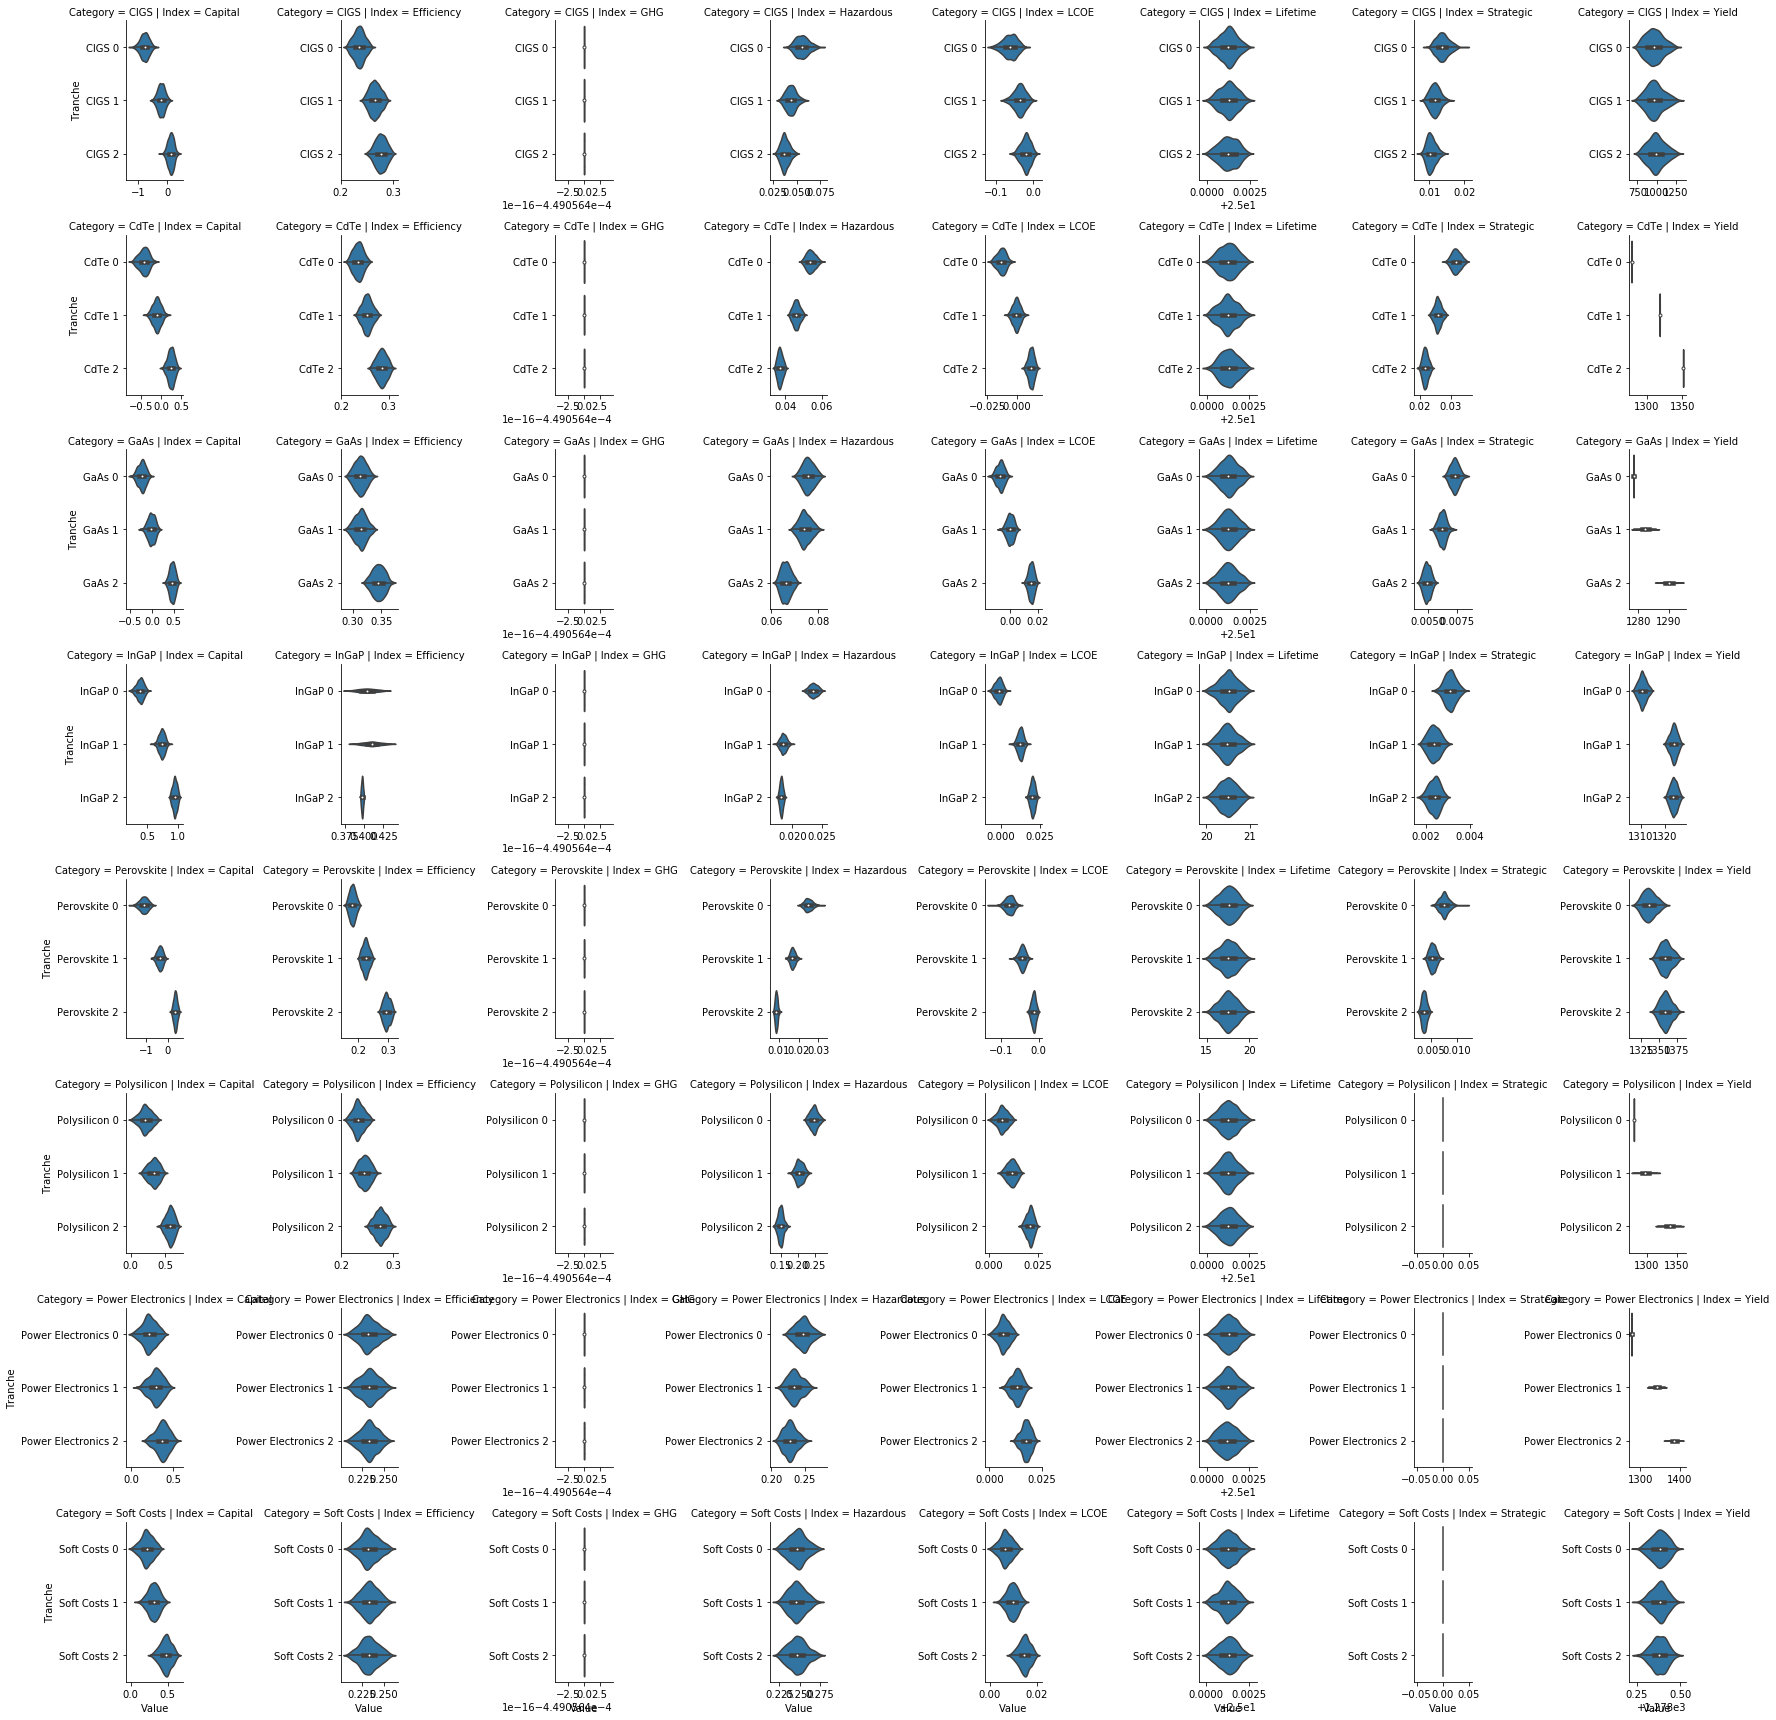

In [17]:
g = sb.FacetGrid(
    data = investments.tranches.join(scenario_results).xs("Metric", level = "Variable").reset_index(),
    row = "Category",
    col = "Index",
    sharex = False,
    sharey = False,
)
g.map(
    sb.violinplot,
    "Value",
    "Tranche",
)

## Evaluate the investments in the dataset.

In [18]:
investment_results = investments.evaluate_investments(designs, sample_count=500)

### Costs of investments.

In [19]:
investment_results.amounts

,Amount
Investment,
High R&D,50000000.0
Moderate R&D,25000000.0
No R&D,0.0


### Benefits of investments.

In [20]:
investment_results.summary.set_index(
    "Units", append = True
).groupby(
    ["Investment", "Index", "Units"]
).aggregate(
    np.mean
).pivot_table(
    index = ["Index", "Units"],
    columns = "Investment",
)

Value                            
Investment                    High R&D  Moderate R&D        No R&D
Index      Units                                                  
Capital    Δ$/Wdc             3.543942      0.968197     -1.567430
Efficiency %/100              2.339573      2.180850      2.065917
GHG        ΔgCO2e/system     -0.003592     -0.003592     -0.003592
Hazardous  g/kWh              0.791407      0.886706      0.974180
LCOE       Δ$/kWh             0.066514     -0.036854     -0.144092
Lifetime   yr               188.036767    187.965645    187.950550
Strategic  g/kWh              0.042948      0.051013      0.063362
Yield      hr/yr          10329.872160  10170.634733  10008.224924

### Save results.

In [21]:
investment_results.amounts.to_csv("output/example-investment-amounts.csv")

In [22]:
investment_results.metrics.to_csv("output/example-investment-metrics.csv")

### Plot the results.

In [23]:
investment_results.summary

Value          Units
Investment Sample Index                                  
No R&D     1      Capital        -1.330064         Δ$/Wdc
                  Efficiency      2.112925          %/100
                  GHG            -0.003592  ΔgCO2e/system
                  Hazardous       0.934142          g/kWh
                  LCOE           -0.170537         Δ$/kWh
...                                    ...            ...
High R&D   500    Hazardous       0.794865          g/kWh
                  LCOE            0.065975         Δ$/kWh
                  Lifetime      188.093315             yr
                  Strategic       0.042849          g/kWh
                  Yield       10367.843881          hr/yr

[12000 rows x 2 columns]

/nix/store/2hqyq1p29z76wvh920r43a63sy9n1cag-python3-3.7.6-env/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


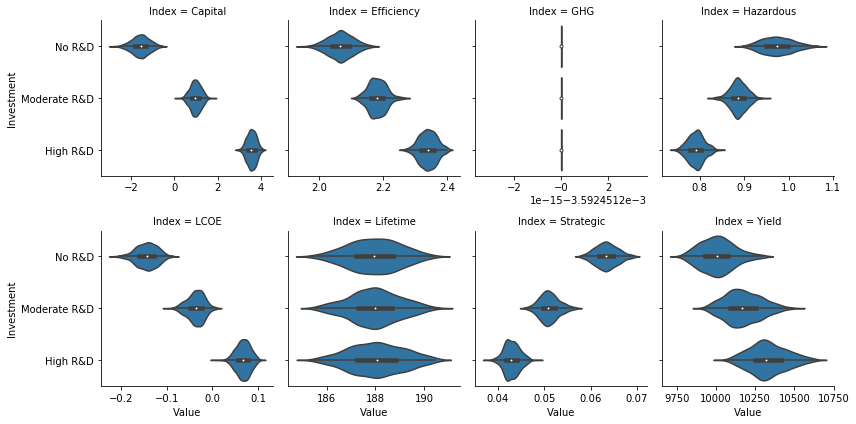

In [24]:
g = sb.FacetGrid(
    data = b
    .reset_index(),
    col = "Index",
    sharex = False,
    col_wrap = 4
)
g.map(
    sb.violinplot,
    "Value",
    "Investment",
)

In [31]:
investment_results.summary

Value          Units
Investment Sample Index                                  
No R&D     1      Capital        -1.330064         Δ$/Wdc
                  Efficiency      2.112925          %/100
                  GHG            -0.003592  ΔgCO2e/system
                  Hazardous       0.934142          g/kWh
                  LCOE           -0.170537         Δ$/kWh
...                                    ...            ...
High R&D   500    Hazardous       0.794865          g/kWh
                  LCOE            0.065975         Δ$/kWh
                  Lifetime      188.093315             yr
                  Strategic       0.042849          g/kWh
                  Yield       10367.843881          hr/yr

[12000 rows x 2 columns]

In [33]:
investment_results.summary[
    investment_results.summary.index.get_level_values("Index").isin(["Capital", "Efficiency", "Hazardous", "LCOE", "Strategic", "Yield"])
]

Value   Units
Investment Sample Index                           
No R&D     1      Capital        -1.330064  Δ$/Wdc
                  Efficiency      2.112925   %/100
                  Hazardous       0.934142   g/kWh
                  LCOE           -0.170537  Δ$/kWh
                  Strategic       0.067132   g/kWh
...                                    ...     ...
High R&D   500    Efficiency      2.325649   %/100
                  Hazardous       0.794865   g/kWh
                  LCOE            0.065975  Δ$/kWh
                  Strategic       0.042849   g/kWh
                  Yield       10367.843881   hr/yr

[9000 rows x 2 columns]